To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

In [1]:
!apt-get install r-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [6]:
library(readr)
library(dplyr)
library(caret)
library(rpart)
library(e1071)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice



In [7]:
team1_data <- read_csv("/content/Copy of TEAM1(1).csv")
team2_data <- read_csv("/content/Copy of TEAM2(1).csv")

Rows: 11 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): PLAYER, ROLE
dbl (21): INNS, NOT_OUTS, FIFTIES, CENTURIES, HIGH_SCORE, RUNS, AVG, STRIKER...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 33 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): PLAYER, ROLE
dbl (21): INNS, NOT_OUTS, FIFTIES, CENTURIES, HIGH_SCORE, RUNS, AVG, STRIKER...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 554

    PLAYER              ROLE                INNS          NOT_OUTS     
 Length:44          Length:44          Min.   : 0.00   Min.   : 0.000  
 Class :character   Class :character   1st Qu.: 0.00   1st Qu.: 0.000  
 Mode  :character   Mode  :character   Median : 5.50   Median : 1.000  
                                       Mean   :19.82   Mean   : 3.932  
                                       3rd Qu.:35.00   3rd Qu.: 7.000  
                                       Max.   :72.00   Max.   :14.000  
    FIFTIES         CENTURIES        HIGH_SCORE          RUNS       
 Min.   : 0.000   Min.   : 0.000   Min.   :  0.00   Min.   :   0.0  
 1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.:  0.00   1st Qu.:   0.0  
 Median : 0.000   Median : 0.000   Median :  4.50   Median :  23.0  
 Mean   : 4.341   Mean   : 1.795   Mean   : 48.84   Mean   : 719.9  
 3rd Qu.: 4.750   3rd Qu.: 0.250   3rd Qu.: 85.75   3rd Qu.: 813.8  
 Max.   :24.000   Max.   :12.000   Max.   :210.00   Max.   :3616.0  
      AVG    

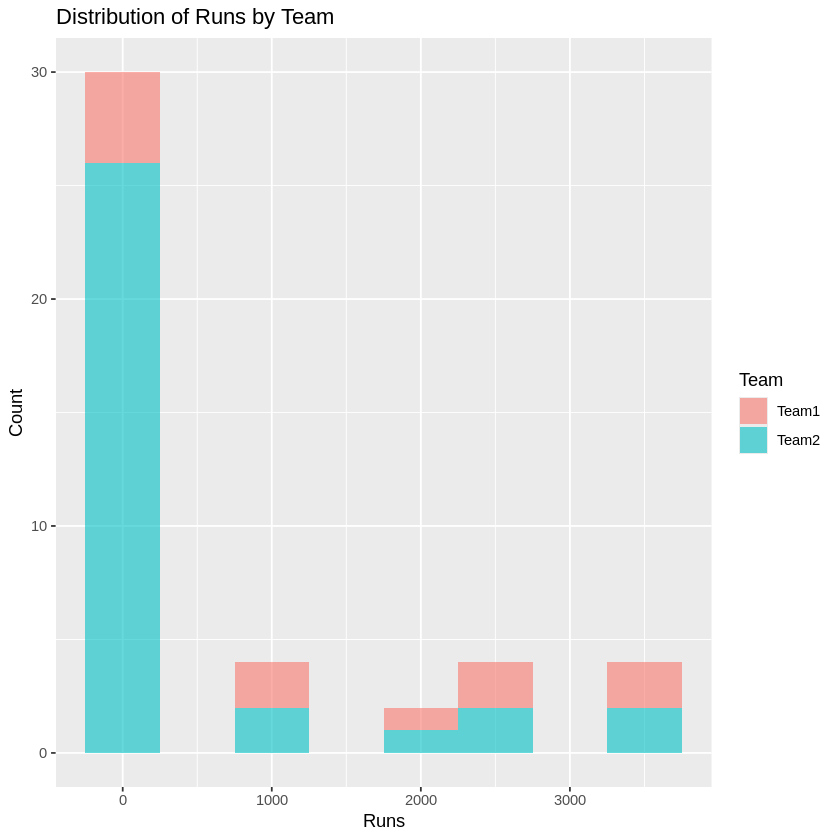

In [11]:
# Add a column to distinguish between the two teams
team1_data$Team <- "Team1"
team2_data$Team <- "Team2"

# Combine the datasets
combined_data <- bind_rows(team1_data, team2_data)

# Step 2: Data Preprocessing
# Check for missing values
sum(is.na(combined_data))

# Handle missing values (if any)
combined_data <- combined_data %>%
  mutate(across(everything(), ~ ifelse(is.na(.), 0, .)))

# Convert the target variable (Team) to a factor
combined_data$Team <- as.factor(combined_data$Team)

# Step 3: Exploratory Data Analysis (EDA)
# Summary statistics
summary(combined_data)

# Visualize the distribution of runs by team
ggplot(combined_data, aes(x = RUNS, fill = Team)) +
  geom_histogram(binwidth = 500, alpha = 0.6) +
  labs(title = "Distribution of Runs by Team", x = "Runs", y = "Count")

# Step 4: Split the data into training and testing sets
set.seed(123)
train_index <- createDataPartition(combined_data$Team, p = 0.8, list = FALSE)
train_data <- combined_data[train_index, ]
test_data <- combined_data[-train_index, ]


In [13]:
# Step 5: Train Models
# Logistic Regression
log_reg_model <- glm(Team ~ RUNS + AVG + STRIKERATE + WICKETS_TAKEN,
                     data = train_data, family = binomial)
summary(log_reg_model)


Call:
glm(formula = Team ~ RUNS + AVG + STRIKERATE + WICKETS_TAKEN, 
    family = binomial, data = train_data)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)  
(Intercept)    4.1624644  1.8479869   2.252   0.0243 *
RUNS          -0.0002140  0.0008666  -0.247   0.8050  
AVG           -0.0411091  0.0998957  -0.412   0.6807  
STRIKERATE    -0.0098045  0.0499964  -0.196   0.8445  
WICKETS_TAKEN -0.0373762  0.0279252  -1.338   0.1808  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 40.488  on 35  degrees of freedom
Residual deviance: 27.692  on 31  degrees of freedom
AIC: 37.692

Number of Fisher Scoring iterations: 6


In [14]:
# Step 5: Train Models
# Logistic Regression
log_reg_model <- glm(Team ~ RUNS + AVG + STRIKERATE + WICKETS_TAKEN,
                     data = train_data, family = binomial)
summary(log_reg_model)

# Decision Tree
dt_model <- rpart(Team ~ RUNS + AVG + STRIKERATE + WICKETS_TAKEN,
                  data = train_data, method = "class")
print(dt_model)

# Support Vector Machine (SVM)
svm_model <- svm(Team ~ RUNS + AVG + STRIKERATE + WICKETS_TAKEN,
                 data = train_data, kernel = "linear")
summary(svm_model)


Call:
glm(formula = Team ~ RUNS + AVG + STRIKERATE + WICKETS_TAKEN, 
    family = binomial, data = train_data)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)  
(Intercept)    4.1624644  1.8479869   2.252   0.0243 *
RUNS          -0.0002140  0.0008666  -0.247   0.8050  
AVG           -0.0411091  0.0998957  -0.412   0.6807  
STRIKERATE    -0.0098045  0.0499964  -0.196   0.8445  
WICKETS_TAKEN -0.0373762  0.0279252  -1.338   0.1808  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 40.488  on 35  degrees of freedom
Residual deviance: 27.692  on 31  degrees of freedom
AIC: 37.692

Number of Fisher Scoring iterations: 6


n= 36 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 36 9 Team2 (0.2500000 0.7500000) *



Call:
svm(formula = Team ~ RUNS + AVG + STRIKERATE + WICKETS_TAKEN, data = train_data, 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  20

 ( 9 11 )


Number of Classes:  2 

Levels: 
 Team1 Team2




In [16]:
# Step 6: Evaluate Models
# Logistic Regression
log_reg_pred <- predict(log_reg_model, test_data, type = "response")
log_reg_pred_class <- ifelse(log_reg_pred > 0.5, "Team2", "Team1")
log_reg_accuracy <- mean(log_reg_pred_class == test_data$Team)
cat("Logistic Regression Accuracy:", log_reg_accuracy, "\n")

# Decision Tree
dt_pred <- predict(dt_model, test_data, type = "class")
dt_accuracy <- mean(dt_pred == test_data$Team)
cat("Decision Tree Accuracy:", dt_accuracy, "\n")

# SVM
svm_pred <- predict(svm_model, test_data)
svm_accuracy <- mean(svm_pred == test_data$Team)
cat("SVM Accuracy:", svm_accuracy, "\n")

Logistic Regression Accuracy: 0.625 
Decision Tree Accuracy: 0.75 
SVM Accuracy: 0.625 
